# Projeto de Sinais

## Sinais e Sistemas Dinâmicos - Prof. Derzu Omaia

## Jansepetrus Brasileiro Pereira e Nathália de Vasconcelos Silva

Descrição do projeto: https://www.dropbox.com/s/wzibx7g7136um4z/Projeto.pdf?dl=0

## Importar todas as bibliotecas necessárias para o projeto

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import butter, lfilter, freqz
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Definição das funções de plot

In [3]:
def plot_wav(wav, sample_rate, save_plot=False, nome_plot="", sufixo_nome=""):
    if(nome_plot == ""):
        nome_plot = str(datetime.now()).replace(":","-")
        
    times = np.arange(len(wav))/float(sample_rate)

    plt.figure(figsize=(30, 4))

    if(wav.ndim == 2):
        plt.fill_between(times, wav[:,0], wav[:,1], color='k') # para dual-channel
    else:
        plt.fill_between(times, wav)

    plt.xlim(times[0], times[-1])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.title(sufixo_nome, loc='left')
    plt.title(nome_plot, loc='right')
    
    if(save_plot):
        plt.savefig(nome_plot + "_" + sufixo_nome + '.png', dpi=210)
    plt.show()

def plot_wav_freqDomain(fft_wav, freq, N, save_plot=False, nome_plot="", sufixo_nome=""):
    if(nome_plot == ""):
        nome_plot = str(datetime.now()).replace(":","-")
        
    plt.plot(freq, (1.0/N)*np.abs(fft_wav))
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude do Espectro (Domínio da Frequência)')
    plt.title(sufixo_nome, loc='left')
    plt.title(nome_plot, loc='right')
    plt.grid()
    if(save_plot):
        plt.savefig(nome_plot + "_" + sufixo_nome + '.png', dpi=210)
    plt.show()
    
def simple_plot_wav(wav_data, sample_rate, L, sufixo_nome="", save_plot=False, nome_plot=""):
    if(nome_plot == ""):
        nome_plot = str(datetime.now()).replace(":","-")

    plt.plot(np.arange(L) / sample_rate, wav_data)
    plt.xlim(0,L/sample_rate)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude');
    plt.title(sufixo_nome, loc='left')
    plt.title(nome_plot, loc='right')
    
    if(save_plot):
        plt.savefig(nome_plot + "_" + sufixo_nome + '.png', dpi=210)
    plt.show()
    
def plot_resposta_freq(w, h, sample_rate, freq_corte, sufixo_nome="", save_plot=False, nome_plot=""):
    if(nome_plot == ""):
        nome_plot = str(datetime.now()).replace(":","-")
    
    #plt.subplot(2, 1, 1)
    plt.plot(0.5*sample_rate*w/np.pi, np.abs(h), 'b')
    plt.plot(freq_corte, 0.5*np.sqrt(2), 'ko')
    plt.axvline(freq_corte, color='k')
    plt.xlim(0, 0.5*sample_rate)
    plt.title("Resposta em Frequência - Filtro Passa-Baixa")
    plt.xlabel('Frequência (Hz)')
    plt.grid()
        
    if(save_plot):
        plt.savefig(nome_plot + "_" + sufixo_nome + '.png', dpi=210)
    
    plt.show()

## Definição dos parâmetros de execução

In [4]:
N_DF = '003_' # Número referente à geração executada
NOME_DF = 'WAV_DF_INST' # Nome do DataFrame
EXTENSAO_DF = '.pkl' # Extensão do arquivo do DataFrame - default: .pkl

INSTANCIAS = 100 # Quantidade de Instâncias por instrumento
FILTRAR = False # Se vai utilizar filtro ou não
PORC_CROP = 0.2 # Porcentagem do Crop do sinal final
if(FILTRAR):
    FILTRO = 'FILT'
else:
    FILTRO = 'nFILT'

PARAMETROS_DE_GERACAO = str(INSTANCIAS) + '_' + str(int(PORC_CROP * 100)) + 'pc_'+ FILTRO
DATAFRAME_NAME = N_DF + NOME_DF + PARAMETROS_DE_GERACAO + EXTENSAO_DF

#ROOT_PATH = 'IRMAS-TrainingData_red' + os.sep
#ROOT_PATH = 'INST_' + str(INSTANCIAS) + os.sep
ROOT_PATH = 'DB_REL' + os.sep

PLOT_SINAL_ORIGINAL = True
PLOT_SINAL_FFT = True
PLOT_SINAL_FFT_SHIFT = True
PLOT_SINAL_FFT_SHIFT_RESPFREQ = True
PLOT_SINAL_FFT_SHIFT_BUTTER = True
PLOT_SINAL_FFT_SHIFT_BUTTER_COMPARATIVO = False
PLOT_SINAL_FFT_SHIFT_BUTTER_CORTE = True

## Tratamento do sinal

- Percorrer a pasta do dataset IRMAS
- Abrir todos os arquivos .wav
- Aplicar a transformada de Fourier 
- Transformada de Fourier deslocada 
- Filtro passa-baixa Butterworth (*)
- Realizar um _crop_ 
- Salvar o sinal em um dataframe

Referência 1: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

Referência 2: Notas de Aula da Disciplina

2018-11-04 17:22:43.785325 - [tru][cla]1870__2.wav - Iniciando...


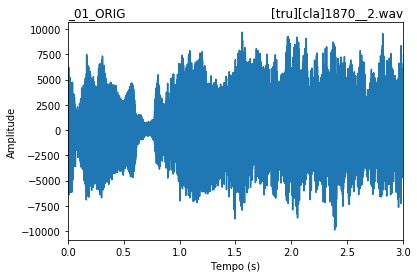

2018-11-04 17:22:44.744175 - [tru][cla]1870__2.wav - Aplicando FFT...


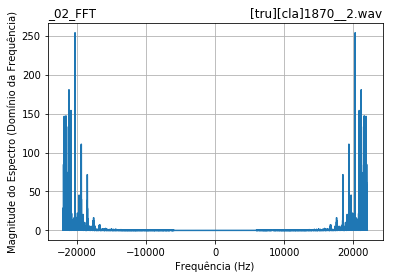

2018-11-04 17:23:00.495730 - [tru][cla]1870__2.wav - Movimentando os componentes de frequencia zero para o centro do espectro...


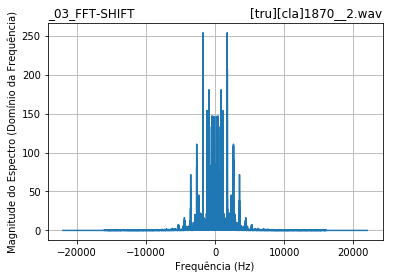

2018-11-04 17:23:00.937682 - [tru][cla]1870__2.wav - Reduzindo o tamanho do dataset, para colocar no DataFrame...


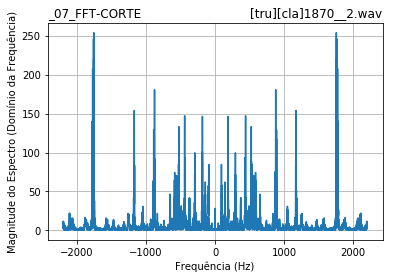

2018-11-04 17:23:01.269611 - [tru][cla]1870__2.wav - Adicionando ao dataset...


2018-11-04 17:23:01.269611 - Convertendo o dataset em DataFrame. 

2018-11-04 17:23:01.704543 - Finalizando o DataFrame: 003_WAV_DF_INST100_20pc_nFILT.pkl


In [6]:
signal_dataset = []

for root, dirs, files in os.walk(ROOT_PATH):  
    for filename in files:

        print(str(datetime.now()) + ' - ' + str(filename) + ' - Iniciando...')
        
        ####
        # Leitura do arquivo WAV
        ####
        
        sample_rate, wav_data = wavfile.read(root + os.sep + filename)
        
        ####
        # Captura do sinal em um ndarray
        ####

        wav_data = np.mean(wav_data, axis=1) #Conversao de sinal stereo para mono, fazendo a media dos canais esquerdo e direito
        
        ####
        # Especificacoes do dominio do tempo
        ####
        
        L = wav_data.shape[0]
        dt = 1.0 / sample_rate
        t = np.arange(0, (L/sample_rate)-dt, dt).T # Discretizacao da amostragem ao passo ((L/sample_rate)-dt)
        #t = np.linspace(0, dt, L)
        N = t.size + 1
        if (PLOT_SINAL_ORIGINAL):
            #plot_wav(wav_data, sample_rate, sufixo_nome="ORIG", save_plot=True, nome_plot=filename)
            simple_plot_wav(wav_data, sample_rate, L, sufixo_nome="_01_ORIG", save_plot=True, nome_plot=filename)
        
        ####
        # Especificacoes do dominio da frequencia
        ####
        
        dF = sample_rate/N # hertz
        freq = np.arange(-sample_rate/2, sample_rate/2-dF, dF)
        freq_max = np.amax(freq)
        
        ####
        # Aplicacao da FFT
        ####
        
        print(str(datetime.now()) + ' - ' + str(filename) + ' - Aplicando FFT...')
        fft_output = fft(wav_data) # Fourier.
        if (PLOT_SINAL_FFT):
            plot_wav_freqDomain(fft_output, freq, N, sufixo_nome="_02_FFT", save_plot=True, nome_plot=filename)

        ####
        # Movimentacao dos componentes de frequencia zero para o centro do espectro
        ####
        
        print(str(datetime.now()) + ' - ' + str(filename) + ' - Movimentando os componentes de frequencia zero para o centro do espectro...')
        fft_shifted = np.fft.fftshift( fft_output ) # Desloca o centro zero da transformada para o centro.
        #freq_shifted = np.fft.fftshift(freq)
        
        if (PLOT_SINAL_FFT_SHIFT):
            plot_wav_freqDomain(fft_shifted, freq, N, sufixo_nome="_03_FFT-SHIFT", save_plot=True, nome_plot=filename)

        ####
        # Aplicacao do Filtro Passa-Baixa Butterworth
        ####
        
        if(FILTRAR):
            
            print(str(datetime.now()) + ' - ' + str(filename) + ' - Aplicando Filtro Passa-Baixa Butterworth...')
            
            ####
            # Parâmetros do Butterworth
            ####
            
            butter_order = 6
            freq_corte = freq_max * 0.3 # TODO: Precisa descobrir se essa e' uma boa frequencia de corte para utilizar no Passa-Baixa Butterworth
            butter_cutoff = freq_corte / (0.5 * sample_rate)

            b, a = butter(butter_order, butter_cutoff, btype='low', analog=False)
            w, h = freqz(b, a, worN=8000)

            ####
            # Resposta em frequência do sinal
            ####
            
            if(PLOT_SINAL_FFT_SHIFT_RESPFREQ):
                print(str(datetime.now()) + ' - ' + str(filename) + ' - Verificando a resposta em frequência do sinal...')
                plot_resposta_freq(w, h, sample_rate, freq_corte, sufixo_nome="_04_FFT-SHIFT-RESPFREQ", save_plot=True, nome_plot=filename)

            ####
            # Aplicação do filtro passa-baixa
            ####
            
            print(str(datetime.now()) + ' - ' + str(filename) + ' - Aplicando o filtro passa-baixa...')
            fft_X_filtro = lfilter(b, a, fft_shifted)

            if(PLOT_SINAL_FFT_SHIFT_BUTTER):
                plot_wav_freqDomain(fft_X_filtro, freq, N, sufixo_nome="_05_FFT-SHIFT-FILT", save_plot=True, nome_plot=filename)

            if(PLOT_SINAL_FFT_SHIFT_BUTTER_COMPARATIVO):
                plt.plot(freq, fft_shifted.real, 'b-', label='data')
                plt.plot(freq, fft_X_filtro.real, 'g-', linewidth=2, label='filtered data')
                plt.title("_06_FFT-SHIFT-BUTTER-COMPARATIVO", loc='left')
                plt.title(filename, loc='right')
                plt.xlabel('Time [sec]')
                plt.grid()
                plt.legend()
                plt.savefig(filename + "_" + "_06_FFT-SHIFT-BUTTER-COMPARATIVO" + '.png', dpi=210)
                plt.show()
        else:
            fft_X_filtro = fft_shifted
        
        ####
        # "Crop" do sinal, a fim de reduzir o tamanho das amostras para o DataFrame
        ####
        
        print(str(datetime.now()) + ' - ' + str(filename) + ' - Reduzindo o tamanho do dataset, para colocar no DataFrame...')
        
        centro_espectro = (fft_X_filtro.shape[0]) // 2 # Cálculo do centro do espectro
        offset = int((fft_X_filtro.shape[0]) * 0.05) # 5% de offset a partir do centro do espectro
        
        fft_filtro_corte = fft_X_filtro[centro_espectro-offset:centro_espectro+offset,]
        freq_dataframe = freq[centro_espectro-offset:centro_espectro+offset,]

        if(PLOT_SINAL_FFT_SHIFT_BUTTER_CORTE):
            plot_wav_freqDomain(fft_filtro_corte, freq_dataframe, N, sufixo_nome="_07_FFT-CORTE", save_plot=True, nome_plot=filename)
         
        ####
        # Adicao do sinal filtrado ao DataSet, para ser transformado em um DataFrame.
        ####
        
        print(str(datetime.now()) + ' - ' + str(filename) + ' - Adicionando ao dataset...\n')
        
        signal_dataset.append(fft_filtro_corte)

####
# Criacao do DataFrame
####
        
print('\n' + str(datetime.now()) + ' - Convertendo o dataset em DataFrame. ')

df_data = pd.DataFrame(signal_dataset)
df_data.to_pickle(DATAFRAME_NAME)

print('\n' + str(datetime.now()) + ' - Finalizando o DataFrame: ' + DATAFRAME_NAME)

## Ler um DataFrame salvo na máquina

In [2]:
data_frame = pd.read_pickle(DATAFRAME_NAME)

## Especificar o tipo do instrumento das instâncias

### Para 1 instância de cada instrumento

data_frame = data_frame.assign(instrument = '')

data_frame.iloc[0:1, 52918] = 'cel'
data_frame.iloc[1:2, 52918] = 'cla'
data_frame.iloc[2:3, 52918] = 'flu'
data_frame.iloc[3:4, 52918] = 'gac'
data_frame.iloc[4:5, 52918] = 'gel'
data_frame.iloc[5:6, 52918] = 'org'
data_frame.iloc[6:7, 52918] = 'pia'
data_frame.iloc[7:8, 52918] = 'sax'
data_frame.iloc[8:9, 52918] = 'tru'
data_frame.iloc[9:10, 52918] = 'vio'

### Para 5 instâncias de cada instrumento

data_frame = data_frame.assign(instrument = '')

data_frame.iloc[0:5, 13228] = 'cel'
data_frame.iloc[5:10, 13228] = 'cla'
data_frame.iloc[10:15, 13228] = 'flu'
data_frame.iloc[15:20, 13228] = 'gac'
data_frame.iloc[20:25, 13228] = 'gel'
data_frame.iloc[25:30, 13228] = 'org'
data_frame.iloc[30:35, 13228] = 'pia'
data_frame.iloc[35:40, 13228] = 'sax'
data_frame.iloc[40:45, 13228] = 'tru'
data_frame.iloc[45:50, 13228] = 'vio'

### Para 20 instâncias de cada instrumento

data_frame = data_frame.assign(instrument = '')

data_frame.iloc[0:20, 52918] = 'cel'
data_frame.iloc[20:40, 52918] = 'cla'
data_frame.iloc[40:60, 52918] = 'flu'
data_frame.iloc[60:80, 52918] = 'gac'
data_frame.iloc[80:100, 52918] = 'gel'
data_frame.iloc[100:120, 52918] = 'org'
data_frame.iloc[120:140, 52918] = 'pia'
data_frame.iloc[140:160, 52918] = 'sax'
data_frame.iloc[160:180, 52918] = 'tru'
data_frame.iloc[180:200, 52918] = 'vio'

### Para 100 instâncias de cada instrumento

In [3]:
data_frame = data_frame.assign(instrument = '')

data_frame.iloc[0:100, 52918] = 'cel'
data_frame.iloc[100:200, 52918] = 'cla'
data_frame.iloc[200:300, 52918] = 'flu'
data_frame.iloc[300:400, 52918] = 'gac'
data_frame.iloc[400:500, 52918] = 'gel'
data_frame.iloc[500:600, 52918] = 'org'
data_frame.iloc[600:700, 52918] = 'pia'
data_frame.iloc[700:800, 52918] = 'sax'
data_frame.iloc[800:900, 52918] = 'tru'
data_frame.iloc[900:1000, 52918] = 'vio'

## Usar o LabelEncoder na classe instrumento de todas as instâncias

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [4]:
instrument = data_frame.iloc[:, 52918].values
instrument = LabelEncoder().fit_transform(instrument)
data_frame['instrument'] = instrument

## Preparar variáveis para treino e teste geral

In [5]:
nX = data_frame.iloc[:, :-1].values
ny = data_frame.iloc[:, 52918].values

X_train, X_test, y_train, y_test = train_test_split(nX, ny, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [6]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para todas as instâncias do dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [7]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina geral

In [8]:
y_pred = classifier.predict(X_test)

## Acurácia geral

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [9]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.11


## Plot

([<matplotlib.axis.YTick at 0x7f5029f4b940>,
 <a list of 10 Text yticklabel objects>)

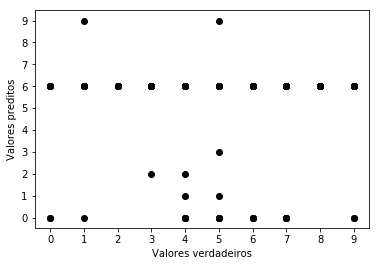

In [10]:
plt.scatter(y_test, y_pred, c = 'black')
plt.xlabel("Valores verdadeiros")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylabel("Valores preditos")
plt.yticks([0,1,2,3,4,5,6,7,8,9])

## Matriz de confusão

In [11]:
cnf = confusion_matrix(y_test, y_pred)
print(cnf)

[[2 0 0 0 0 0 6 0 0 0]
 [1 0 0 0 0 0 5 0 0 1]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 1 0 0 0 9 0 0 0]
 [4 1 1 0 0 0 7 0 0 0]
 [4 1 0 1 0 0 5 0 0 1]
 [3 0 0 0 0 0 9 0 0 0]
 [5 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 9 0 0 0]
 [2 0 0 0 0 0 8 0 0 0]]


## Preparar variáveis para treino e teste do algoritmo de aprendizagem de máquina apenas para o violoncelo

In [12]:
cel_x = data_frame.iloc[0:100, :-1].values
cel_y = data_frame.iloc[0:100, 52918].values

X_train, X_test, y_train, y_test = train_test_split(cel_x, cel_y, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [13]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para as instâncias do "cello" no dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [14]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina para classificar o "cello"

In [15]:
y_pred = classifier.predict(X_test)

## Acurácia do "cello"

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [16]:
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


## Preparar variáveis para treino e teste do algoritmo de aprendizagem de máquina apenas para o clarinete

In [17]:
cla_x = data_frame.iloc[100:200, :-1].values
cla_y = data_frame.iloc[100:200, 52918].values

X_train, X_test, y_train, y_test = train_test_split(cla_x, cla_y, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [18]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para as instâncias do "cla" no dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [19]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina para classificar o "cla"

In [20]:
y_pred = classifier.predict(X_test)

## Acurácia do "cla"

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [21]:
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


## Preparar variáveis para treino e teste do algoritmo de aprendizagem de máquina apenas para a flauta

In [22]:
flu_x = data_frame.iloc[200:300, :-1].values
flu_y = data_frame.iloc[200:300, 52918].values

X_train, X_test, y_train, y_test = train_test_split(flu_x, flu_y, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [23]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para as instâncias do "flu" no dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [24]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina para classificar o "flu"

In [25]:
y_pred = classifier.predict(X_test)

## Acurácia do "flu"

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [26]:
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


## Preparar variáveis para treino e teste do algoritmo de aprendizagem de máquina apenas para a guitarra acústica

In [27]:
gac_x = data_frame.iloc[300:400, :-1].values
gac_y = data_frame.iloc[300:400, 52918].values

X_train, X_test, y_train, y_test = train_test_split(gac_x, gac_y, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [28]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para as instâncias do "gac" no dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina para classificar o "gac"

In [30]:
y_pred = classifier.predict(X_test)

## Acurácia do "gac"

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [31]:
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


## Preparar variáveis para treino e teste do algoritmo de aprendizagem de máquina apenas para a guitarra elétrica

In [32]:
gel_x = data_frame.iloc[400:500, :-1].values
gel_y = data_frame.iloc[400:500, 52918].values

X_train, X_test, y_train, y_test = train_test_split(gel_x, gel_y, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [33]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para as instâncias do "gel" no dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [34]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina para classificar o "gel"

In [35]:
y_pred = classifier.predict(X_test)

## Acurácia do "gel"

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [36]:
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


## Preparar variáveis para treino e teste do algoritmo de aprendizagem de máquina apenas para o órgão

In [37]:
org_x = data_frame.iloc[500:600, :-1].values
org_y = data_frame.iloc[500:600, 52918].values

X_train, X_test, y_train, y_test = train_test_split(org_x, org_y, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [38]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para as instâncias do "org" no dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [39]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina para classificar o "org"

In [40]:
y_pred = classifier.predict(X_test)

## Acurácia do "org"

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [41]:
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


## Preparar variáveis para treino e teste do algoritmo de aprendizagem de máquina apenas para o piano

In [42]:
pia_x = data_frame.iloc[600:700, :-1].values
pia_y = data_frame.iloc[600:700, 52918].values

X_train, X_test, y_train, y_test = train_test_split(pia_x, pia_y, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [43]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para as instâncias do "pia" no dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [44]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina para classificar o "pia"

In [45]:
y_pred = classifier.predict(X_test)

## Acurácia do "pia"

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [46]:
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


## Preparar variáveis para treino e teste do algoritmo de aprendizagem de máquina apenas para o saxofone

In [47]:
sax_x = data_frame.iloc[700:800, :-1].values
sax_y = data_frame.iloc[700:800, 52918].values

X_train, X_test, y_train, y_test = train_test_split(sax_x, sax_y, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [48]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para as instâncias do "sax" no dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [49]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina para classificar o "sax"

In [50]:
y_pred = classifier.predict(X_test)

## Acurácia do "sax"

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [51]:
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


## Preparar variáveis para treino e teste do algoritmo de aprendizagem de máquina apenas para o trumpete

In [52]:
tru_x = data_frame.iloc[800:900, :-1].values
tru_y = data_frame.iloc[800:900, 52918].values

X_train, X_test, y_train, y_test = train_test_split(tru_x, tru_y, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [53]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para as instâncias do "tru" no dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [54]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina para classificar o "tru"

In [55]:
y_pred = classifier.predict(X_test)

## Acurácia do "tru"

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [56]:
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


## Preparar variáveis para treino e teste do algoritmo de aprendizagem de máquina apenas para o violino

In [57]:
vio_x = data_frame.iloc[900:1000, :-1].values
vio_y = data_frame.iloc[900:1000, 52918].values

X_train, X_test, y_train, y_test = train_test_split(vio_x, vio_y, test_size = 0.1, random_state = 13)

## Usar o StandardScaler para alterar a escala dos dados para que o peso deles seja levado em consideração igualmente

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [58]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Executar o algoritmo K-NN para as instâncias do "vio" no dataframe

- n_neighbors = 1    | Seguindo a especificação do trabalho para k = 1
- metric = minkowski | Métrica padrão da distância euclidiana
- p = 2              | Parâmetro da potência para a distância euclidiana

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [59]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predizer o resultado da aprendizagem de máquina para classificar o "vio"

In [60]:
y_pred = classifier.predict(X_test)

## Acurácia do "vio"

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [61]:
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0
